<a href="https://colab.research.google.com/github/santoshdhalwalkar/MobilePhones/blob/main/PricePredictionforMobilePhones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
#import drive from google
from google.colab import drive

In [195]:
# mount the drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [197]:
# read the data from google drive
df =pd.read_csv("/content/drive/MyDrive/Processed_Flipdata - Processed_Flipdata.csv")
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [198]:
#drop the unwanted column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [199]:


df.shape

(541, 11)

In [200]:
# first 5 rows detail

df.head()


,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [201]:
# to last 5 rows details
df.tail()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"
540,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,"15,999"


In [202]:
# what is the info in my data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 46.6+ KB


In [203]:
df. Processor_.unique()

array(['Unisoc Spreadtrum SC9863A1', 'Qualcomm Snapdragon 680',
       'Mediatek Helio A22', 'G37', 'Exynos 850', 'Mediatek Helio P35',
       'Helio G36', 'Unisoc T606', 'Dimensity 6020',
       'Spreadtrum SC9863A1', 'Mediatek Helio G85', 'Helio G85',
       'Mediatek Dimensity 700', 'Mediatek Helio G37', 'Snapdragon 695',
       'Qualcomm Snapdragon 695 5G', 'Mediatek Helio G99', 'Unisoc T612',
       'Exynos 1330, Octa Core ', 'Mediatek Dimensity 930',
       'Qualcomm Snapdragon 695', 'Mediatek Helio G96', 'Helio G99',
       'Helio G88', 'SC6531E', 'Mediatek Dimensity 810',
       'MediaTek Dimensity 800U', 'Mediatek Dimensity 810 5G',
       'Qualcomm Snapdragon 750G', 'Dimensity 8020', 'MediaTek Helio G95',
       'Mediatek Helio G99 Octa Core', 'MediaTek Helio G96', 'MediaTek',
       'Google Tensor', 'Dimensity 810', 'Qualcomm Snapdragon 888',
       'Snapdragon 685', 'Qualcomm Snapdragon 4 Gen 1', '0 0 0 208MHz',
       'MediaTek Helio P35', 'Dimensity 8100', 'UNISOC T700',


In [204]:
df. Processor_.value_counts()

Processor_
Qualcomm Snapdragon 680        33
Unisoc T612                    21
Mediatek Helio A22             19
Mediatek Dimensity 1080        18
Qualcomm Snapdragon 695 5G     17
                               ..
Qualcomm Snapdragon 439         1
Snapdragon 680                  1
snapdragon 888                  1
Qualcomm Snapdragon 855         1
Qualcomm Snapdragon 8 Gen 2     1
Name: count, Length: 123, dtype: int64

In [205]:
# Renaming columns

df = df.rename(columns={
    'Rear Camera': 'RearCamera',
    'Front Camera': 'FrontCamera',
    'AI Lens': 'AILens',
    'Battery_': 'Battery',
    'Processor_': 'Processor',
    'Mobile Height': 'MobileHeight'


    })


## Converte RearCamera obejct type data to Int dtype
** we need to  extract the numeric part of the string and convert it to an integer.**

In [206]:
df['RearCamera'] = df['RearCamera'].str.extract('(\d+)').astype(int)
df['FrontCamera'] = df['FrontCamera'].str.extract('(\d+)').astype(int)

In [207]:
df

,Model,Colour,Memory,RAM,Battery,RearCamera,FrontCamera,AILens,MobileHeight,Processor,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core","38,999"


In [208]:
df.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery', 'RearCamera',
       'FrontCamera', 'AILens', 'MobileHeight', 'Processor', 'Prize'],
      dtype='object')

In [209]:
df.RearCamera.value_counts()

RearCamera
50     260
13      63
64      62
8       52
48      31
108     31
0       10
12      10
200      8
2        6
5        3
40       2
32       2
16       1
Name: count, dtype: int64

In [210]:
df['Prize'] = df['Prize'].str.replace(',', '').astype(int)

In [211]:
df.head()

,Model,Colour,Memory,RAM,Battery,RearCamera,FrontCamera,AILens,MobileHeight,Processor,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999


In [212]:
df.isnull().sum()

Model           0
Colour          0
Memory          0
RAM             0
Battery         0
RearCamera      0
FrontCamera     0
AILens          0
MobileHeight    0
Processor       0
Prize           0
dtype: int64

#Uni-Variate Analysis


**bold text**##Understanding the distribution of values in your data


In [213]:

df['Model'].value_counts()

Model
vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: count, Length: 187, dtype: int64

In [214]:
df['Colour'].value_counts()

Colour
Yellow            12
Royal Blue         8
Power Black        8
Black              8
Midnight Black     7
                  ..
Polar Blue         1
Cosmic grey        1
Sea                1
Infinity Black     1
Sky Blue           1
Name: count, Length: 275, dtype: int64

In [215]:
df['Battery'].value_counts()

Battery
5000    389
6000     42
4500     26
5080      6
4980      6
4300      5
4200      5
4400      5
800       5
1000      4
4700      4
1020      3
4830      3
4600      3
4270      3
4323      3
4050      2
5020      2
3000      2
5200      2
4800      2
4610      2
4020      2
4410      2
4000      1
4030      1
4115      1
3300      1
3110      1
1500      1
1200      1
2550      1
1900      1
7000      1
2815      1
3900      1
3100      1
Name: count, dtype: int64

In [216]:
df['RAM'].value_counts()

RAM
4    186
8    157
6    121
3     40
2     37
Name: count, dtype: int64

In [217]:
df['RearCamera'].value_counts()

RearCamera
50     260
13      63
64      62
8       52
48      31
108     31
0       10
12      10
200      8
2        6
5        3
40       2
32       2
16       1
Name: count, dtype: int64

In [218]:
df['FrontCamera'].value_counts()

FrontCamera
16    164
5     135
8     129
13     49
32     22
0      16
50      7
12      6
60      4
2       3
10      2
20      2
44      2
Name: count, dtype: int64

In [219]:
df['Memory'].value_counts()

Memory
128    259
64     169
256     55
32      52
16       6
Name: count, dtype: int64

###Crosstab is used to aggregate data by groups, providing a summary table that displays the frequency distribution of variables.

####with **aggfunc** Counts the number of occurrences for each combination of categories.

In [220]:
cross_tab = pd.crosstab(df['Processor'], df['Prize'],values=df['Model'], aggfunc='count', margins=True)


cross_tab1 = pd.DataFrame(cross_tab)
cross_tab1

Prize,920,1199,1299,1375,1422,1449,1599,1699,1849,2490,...,40999,41199,43999,44999,49999,53999,55999,79999,80999,All
Processor,,,,,,,,,,,,,,,,,,,,,
0 0 0 208MHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
"2GHz, Quad Core",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6 Core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
"Dimensity 1080, Octa Core",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unisoc Tiger T612 (12 nm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Unisoc Tiger T616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
ios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,3


#### Selecting Rows by Range of Indices

In [221]:
selected_rows = cross_tab1.iloc[50:75]
selected_rows

Prize,920,1199,1299,1375,1422,1449,1599,1699,1849,2490,...,40999,41199,43999,44999,49999,53999,55999,79999,80999,All
Processor,,,,,,,,,,,,,,,,,,,,,
Mediatek Dimensity 810 5G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
Mediatek Dimensity 900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
Mediatek Dimensity 920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
Mediatek Dimensity 930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
Mediatek G96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
Mediatek G99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
Mediatek Helio A22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
Mediatek Helio G35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
Mediatek Helio G37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [222]:
df['Prize'].value_counts()

Prize
15999    23
9999     22
16999    21
8999     20
23999    19
         ..
20998     1
29499     1
8495      1
8449      1
38999     1
Name: count, Length: 158, dtype: int64

 #### **groupby method**  l for data analysis, enabling you to segment your data and perform operations such as sum, mean, count, etc.,

In [223]:
grouped_data1 = df.groupby(['Model', 'Processor']).agg({'Prize': ['sum', 'count']})
grpdata = pd.DataFrame(grouped_data1)
grpdata


Prize      
                                                sum count
Model                Processor                           
APPLE iPhone 11      ios                      41199     1
APPLE iPhone 12      ios                      53999     1
APPLE iPhone 14 Plus 6 Core                   80999     1
                     IOS                      80999     1
                     ios                      80999     1
...                                             ...   ...
vivo Y33s            MediaTek Helio G80       16990     1
vivo Y35             Qualcomm Snapdragon 680  33998     2
vivo Y56 5G          Mediatek Dimensity 700   75996     4
vivo Y565G           MTK Dimensity 700        19979     1
vivo Y75             Mediatek G96             36978     2

[203 rows x 2 columns]

#### Selecting Rows by Range of Indices




In [224]:
selected_grprows = grpdata.iloc[10:20]
selected_grprows

Prize      
                                               sum count
Model                    Processor                      
I Kall Z19Pro Flash blue Octa Core            7999     1
IQOO Neo 7 5G            Dimensity 8200      34688     1
                         Snapdragon 8 Gen 1  30385     1
Infinix HOT 12 Play      Unisoc T610         17998     2
Infinix HOT 20 5G        Dimensity 810       34497     3
Infinix HOT 20 Play      MediaTek G37        33996     4
Infinix HOT 30i          G37                 67992     8
Infinix Hot 11           MediaTek Helio G70  19998     2
Infinix Hot 12           Meditek Helio G37   35996     4
Infinix Hot 12 Pro       Unisoc T616         52995     5

# Grouping by a single feature and calculating multiple statistics on another feature

In [225]:

grouped_data = df.groupby('Model').agg({'Prize': ['mean', 'sum', 'count']})

In [226]:
grouped_data

Prize              
                              mean     sum count
Model                                           
APPLE iPhone 11       41199.000000   41199     1
APPLE iPhone 12       53999.000000   53999     1
APPLE iPhone 14 Plus  80999.000000  242997     3
Google Pixel 6a       29665.666667   88997     3
Google Pixel 7        55999.000000  167997     3
...                            ...     ...   ...
vivo Y33s             16990.000000   16990     1
vivo Y35              16999.000000   33998     2
vivo Y56 5G           18999.000000   75996     4
vivo Y565G            19979.000000   19979     1
vivo Y75              18489.000000   36978     2

[187 rows x 3 columns]

In [227]:
battery_data_6000 = df[(df['Battery'] == 6000) & (df['RAM'] == 6) & (df['Memory'] == 128)]

In [228]:
battery_data_6000

,Model,Colour,Memory,RAM,Battery,RearCamera,FrontCamera,AILens,MobileHeight,Processor,Prize
41,REDMI 10,Caribbean Green,128,6,6000,50,5,0,17.02,Qualcomm Snapdragon 680,10999
65,SAMSUNG Galaxy F14 5G,GOAT Green,128,6,6000,50,13,0,16.76,"Exynos 1330, Octa Core",14490
89,SAMSUNG Galaxy F14 5G,B.A.E. Purple,128,6,6000,50,13,0,16.76,"Exynos 1330, Octa Core",14490
114,REDMI 10,Pacific Blue,128,6,6000,50,5,0,17.02,Qualcomm Snapdragon 680,10999
130,SAMSUNG Galaxy F14 5G,OMG Black,128,6,6000,50,13,0,16.76,"Exynos 1330, Octa Core",14490
132,SAMSUNG Galaxy F14 5G,OMG Black,128,6,6000,50,13,0,16.76,"Exynos 1330, Octa Core",14490
248,REDMI 10,Midnight Black,128,6,6000,50,5,0,17.02,Qualcomm Snapdragon 680,10999


In [229]:
grouped_data1 = df.groupby(['Memory', 'Battery', 'RearCamera', 'Processor']).agg({'Prize': ['count']})
grpdata = pd.DataFrame(grouped_data1)
grpdata


Prize
                                                             count
Memory Battery RearCamera Processor                               
16     1000    0          MTK6261D                               1
                          Spreadtrum                             2
       1200    2          MT6260A                                1
       3000    5          Unisoc SC9863A                         1
       5000    13         Octa Core                              1
...                                                            ...
256    5000    64         Dimensity 8200                         1
                          Qualcomm Snapdragon 7+ Gen 2 (4nm)     6
               108        Mediatek Helio G99                     2
                          Qualcomm Snapdragon 778G               3
       5080    64         Dimensity 8100                         3

[225 rows x 1 columns]

##Creating histograms

For some important features

1.   **Memory:** 128 memory mobile saleing more than others
2.   **Battery: **  5000 battery saleing more than others
3.    **Ram:** 4 abd 8 ram saleing is more than others
4.    ** RearCamera:** 50to 60 RearCamera saleing is more than others



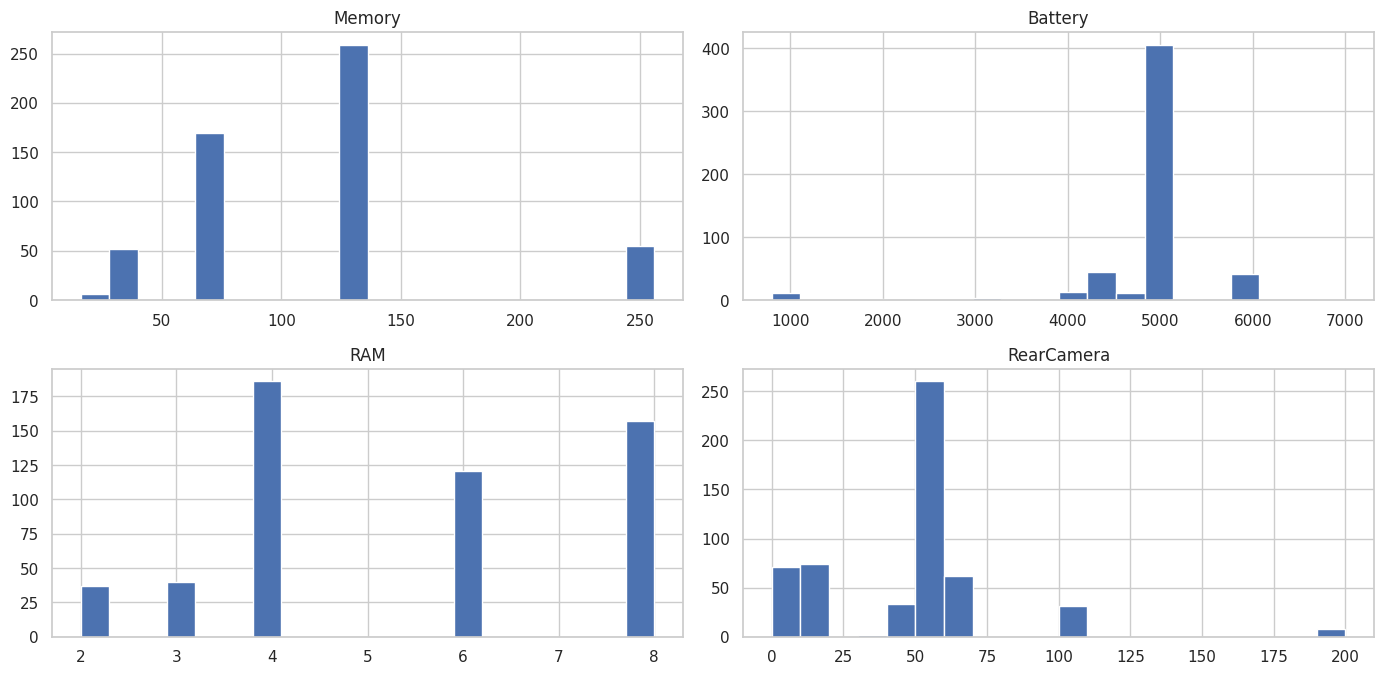

In [230]:
# Set the style of the visualization
sns.set(style="whitegrid")

# List of numerical features to plot
features = ['Memory', 'Battery', 'RAM', 'RearCamera' ]

# Plot histograms
df[features].hist(bins=20, figsize=(14, 10), layout=(3, 2))
plt.tight_layout()
plt.show()

##Creating boxplot to find the outliers

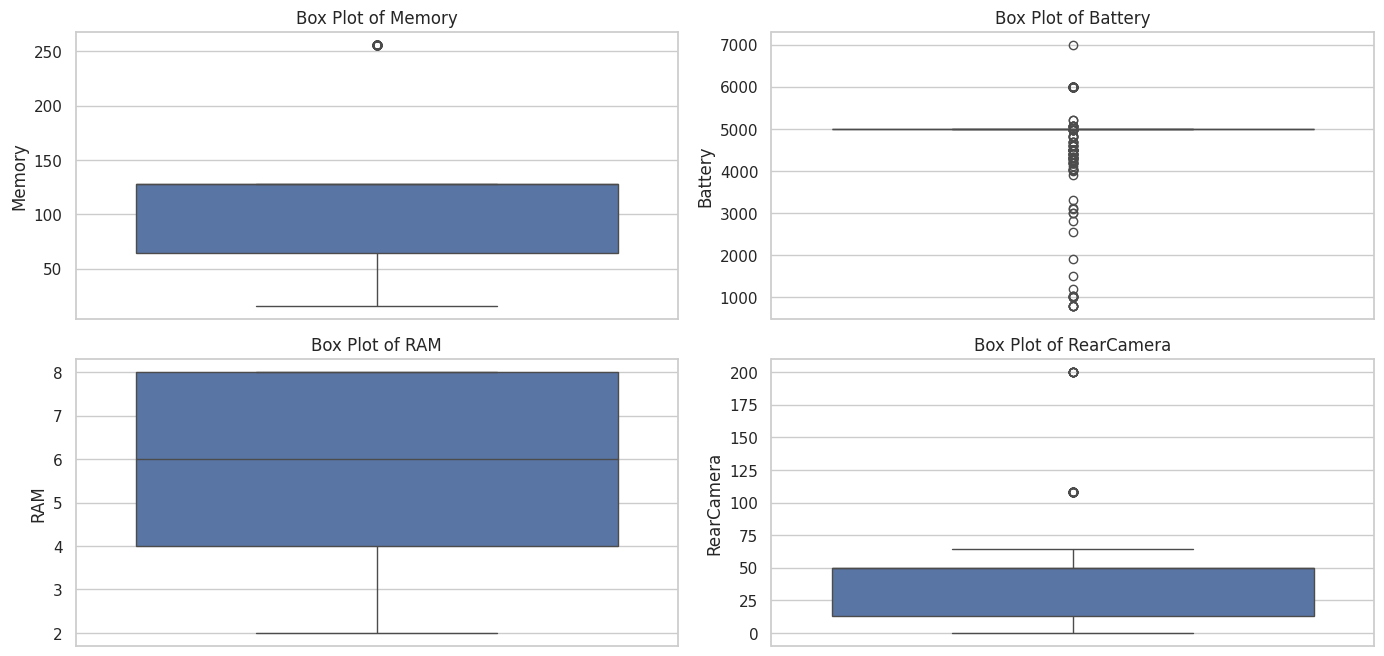

In [231]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

###To create a bivariate scatter plot for visualizing the relationship between two variables.



1.  Scatter Plot of Price vs Memory
    *   data points (devices) clustered around memory sizes of 50, 100, and 250 units.
    *   For 250 units, there is a broader range of prices, including some high-end devices.


2.  Scatter Plot of Price vs Battery
    *   Many devices are clustered around battery capacities of 4000 to 5000 mAh.
    *   Higher battery capacities generally trend towards higher prices, but there are many exceptions.

3.  Scatter Plot of Price vs RAM
    *   Devices are densely clustered around 2GB to 8GB of RAM.
    *  Devices with 6GB to 8GB RAM are spread across a broader price range, including higher prices.

4.  Scatter Plot of Price vs Rear Camera
    *   Devices with around 50 megapixels show a wide range of prices.
    *   List item


####Higher density clusters in the scatter plots indicate popular configurations. These popular configurations often come with a range of prices, reflecting different brands, features, and market segments.


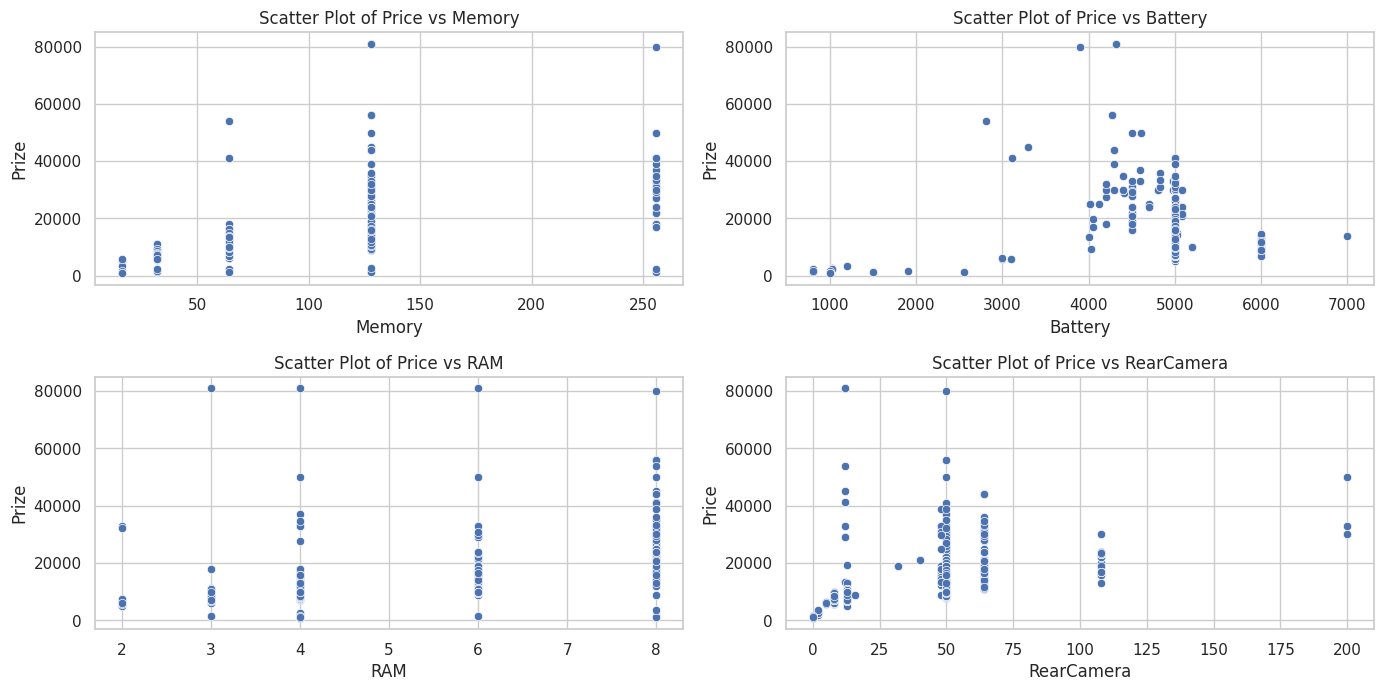

In [232]:
# Plot scatter plots
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=df[feature], y=df['Prize'])
    plt.title(f'Scatter Plot of Price vs {feature}')
plt.xlabel(feature)
plt.ylabel('Price')
plt.tight_layout()
plt.show()

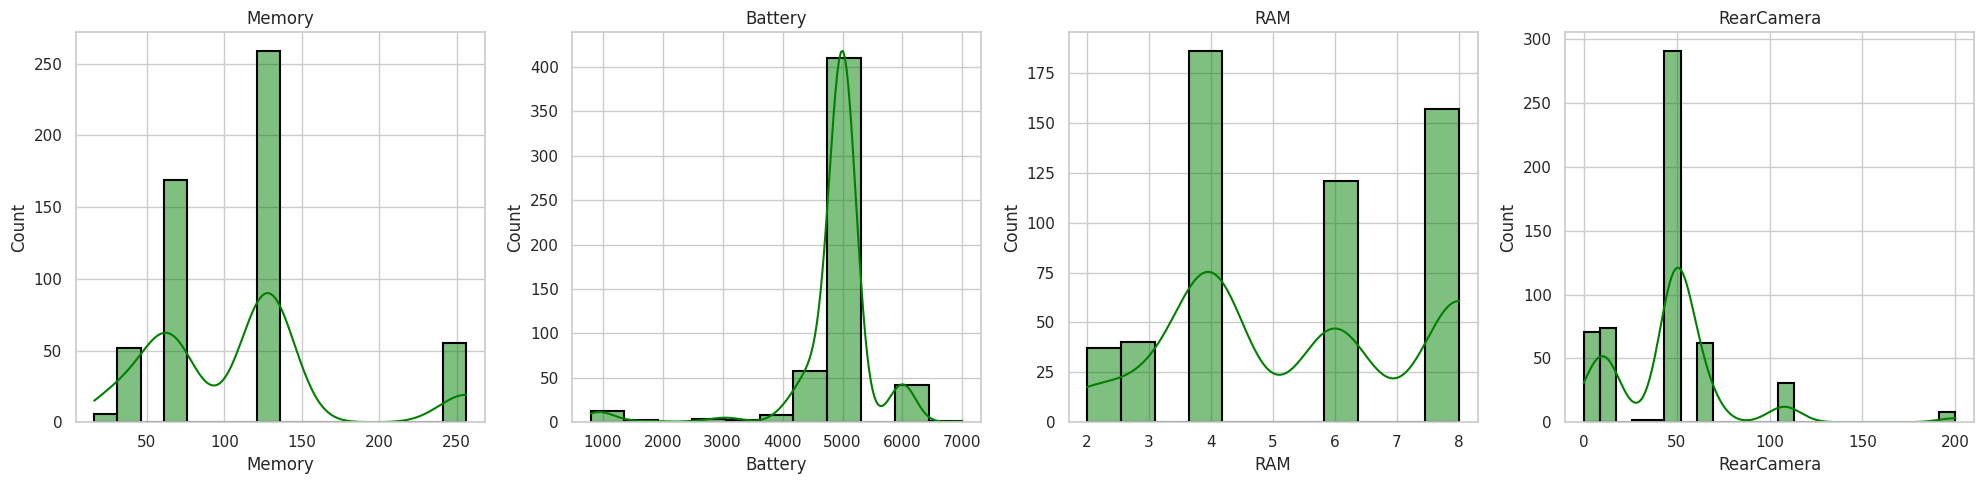

In [233]:
# Set the style of the visualization
sns.set(style="whitegrid")
# List of numerical features to plot
features = ['Memory', 'Battery', 'RAM', 'RearCamera']

# Create a figure with subplots
fifig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Iterate over each feature and plot its histogram
for i, col in enumerate(features):
    sns.histplot(data=df[col], kde=True, color="green", edgecolor='black', linewidth=1.5, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# Price to Performance Ratio

In [234]:
performance_score = df['RAM'] + df['Memory'] / 10  # Simplified example
df['Price_to_Performance_Ratio'] = df['Prize'] / performance_score
df

,Model,Colour,Memory,RAM,Battery,RearCamera,FrontCamera,AILens,MobileHeight,Processor,Prize,Price_to_Performance_Ratio
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,701.826923
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,701.826923
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999,576.875000
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649,1086.346154
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999,432.644231
...,...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999,2380.922619
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998,1153.461538
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990,960.576923
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999,1874.951923


In [235]:
#Use IQR technique to find and rempove outliers

def iqr_technique(DFcol):
    Q1 = np.percentile(DFcol, 25)
    Q3 = np.percentile(DFcol, 75)

    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [236]:
lower_range, upper_range = iqr_technique(df['Memory'])
df = df [(df.Memory > lower_range) & (df.Memory < upper_range) ]

df.shape

(486, 12)

In [237]:
lower_range, upper_range = iqr_technique(df['RearCamera'])
df = df [(df.RearCamera > lower_range) & (df.RearCamera < upper_range) ]

df.shape

(460, 12)

In [238]:
lower_range, upper_range = iqr_technique(df['FrontCamera'])
df = df [(df.FrontCamera > lower_range) & (df.FrontCamera < upper_range) ]

df.shape

(454, 12)

In [239]:
lower_range, upper_range = iqr_technique(df['MobileHeight'])
df = df [(df.MobileHeight > lower_range) & (df.MobileHeight < upper_range) ]

df.shape

(407, 12)

In [240]:
lower_range, upper_range = iqr_technique(df['Prize'])
df = df [(df.Prize > lower_range) & (df.Prize < upper_range) ]

df.shape

(388, 12)

# indentify numberical and categorical data

###Histograms, each representing the distribution (count) of devices for four different features: Memory, Battery, RAM, and Rear Camera.



1.   Memory
      This indicates that devices with 150 GB of memory are the most common, followed by 100 GB and 50 GB.

2.   Battery
    This suggests that most devices have battery capacities around 5000 mAh, likely reflecting a standard or popular choice.

3.  RAM
    This distribution indicates that 4 GB RAM devices are the most common, followed by 8 GB and 6 GB.

4.  Rear Camera
     50-megapixel resolution is the dominant configuration, reflecting a popular choice for rear camera specifications.



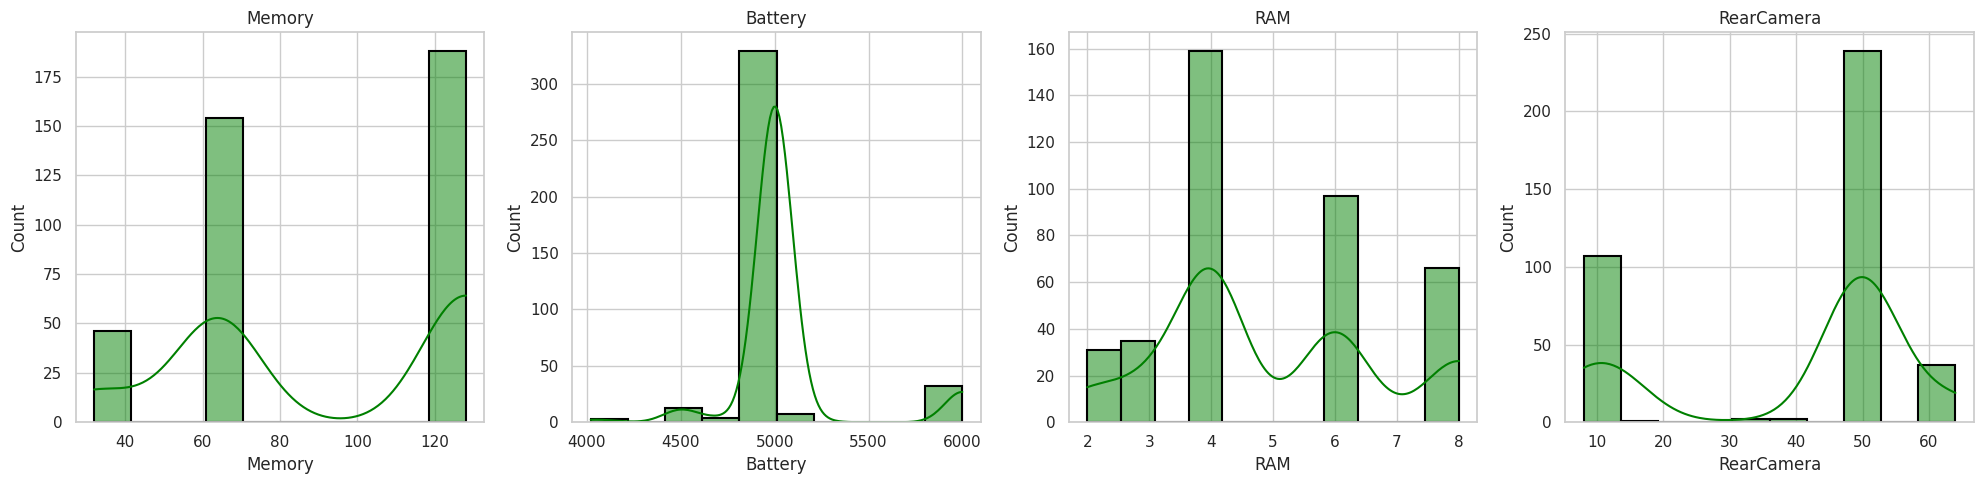

In [241]:
# Set the style of the visualization
sns.set(style="whitegrid")
# List of numerical features to plot
features = ['Memory', 'Battery', 'RAM', 'RearCamera']

# Create a figure with subplots
fifig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Iterate over each feature and plot its histogram
for i, col in enumerate(features):
    sns.histplot(data=df[col], kde=True, color="green", edgecolor='black', linewidth=1.5, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [242]:
num_columns = df.select_dtypes(include=['number']).columns.to_list()
cat_columns = df.select_dtypes(include=['object']).columns.to_list()

In [243]:
num_columns

['Memory',
 'RAM',
 'Battery',
 'RearCamera',
 'FrontCamera',
 'AILens',
 'MobileHeight',
 'Prize',
 'Price_to_Performance_Ratio']

In [244]:
cat_columns

['Model', 'Colour', 'Processor']

In [245]:
from sklearn.preprocessing import LabelEncoder

cat_columns = ['Model', 'Colour', 'Processor']
for col in cat_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

# Separate the features and the target
# Separate X and y

In [246]:
X = df.drop(["Prize"], axis =1 )
y = df["Prize"]

In [247]:
X.shape

(388, 11)

In [248]:
y.shape

(388,)

In [249]:
# pip install sklearn

# Define the train and the test data

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Start the training
# you tell the model based on your X data what is the corresponding y or target

In [251]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((310, 11), (78, 11), (310,), (78,))

In [252]:
from sklearn.preprocessing import StandardScaler

In [253]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [254]:
from sklearn.linear_model import LogisticRegression



# Starting the training job

In [255]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# Evaluate the model

## Logistic Regression model Accuracy rate is 32.05%% which is very bad score

In [256]:


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 32.05%


In [257]:
pd.DataFrame({"predictions":y_pred,"y_test":y_test})

,predictions,y_test
414,6999,8990
470,12999,12599
471,13999,16499
46,9999,7999
55,24999,18999
...,...,...
144,11499,11499
290,16499,8999
253,25999,25999
378,16999,13499


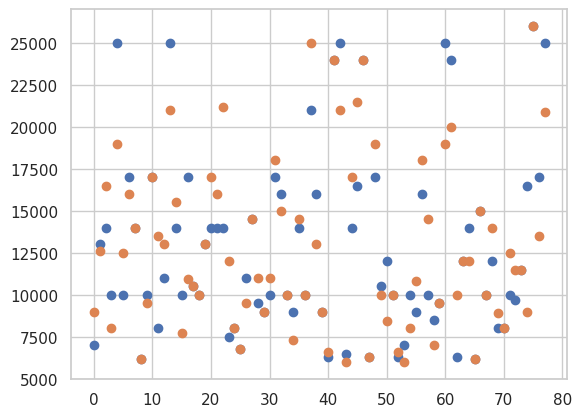

In [258]:
plt.scatter(range(len(y_pred)), y_pred)
plt.scatter(range(len(y_pred)),y_test)

In [259]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(f"Model Accuracy : {accuracy_score(y_pred, y_test)}")
print(f"classification_report : \n {classification_report(y_pred, y_test)}")

Model Accuracy : 0.32051282051282054
classification_report : 
               precision    recall  f1-score   support

        5999       0.00      0.00      0.00         0
        6199       1.00      1.00      1.00         2
        6299       1.00      0.25      0.40         4
        6499       0.00      0.00      0.00         1
        6599       0.00      0.00      0.00         0
        6799       1.00      1.00      1.00         1
        6999       0.00      0.00      0.00         2
        7299       0.00      0.00      0.00         0
        7499       0.00      0.00      0.00         1
        7749       0.00      0.00      0.00         0
        7999       0.50      0.50      0.50         4
        8449       0.00      0.00      0.00         0
        8499       0.00      0.00      0.00         1
        8940       0.00      0.00      0.00         0
        8990       0.00      0.00      0.00         0
        8999       0.67      0.50      0.57         4
        9499      

Model appears to have a oood fit with an R² score of 0.72. However, the MSE and MAE values suggest there are some noticeable errors.

In [272]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f" R2 Score {r2_score(y_pred, y_test)}")
print(f" mean_squared_error {mean_squared_error(y_pred, y_test)}")
print(f" mean_absolute_error {mean_absolute_error(y_pred, y_test)}")

 R2 Score 0.7158084753297547
 mean_squared_error 7052213.91025641
 mean_absolute_error 1807.448717948718


 # DecisionTree Classifier

In [261]:
from sklearn.tree import DecisionTreeClassifier


In [298]:
model_dt = DecisionTreeClassifier()


model_dt.fit(X_train, y_train)
dt_pred = model.predict(X_test)


# Evaluate the model

In [299]:
pd.DataFrame({"dt_pred":dt_pred,"y_test":y_test})

,dt_pred,y_test
414,8999,8990
470,13999,12599
471,13999,16499
46,9999,7999
55,23999,18999
...,...,...
144,7999,11499
290,9999,8999
253,23999,25999
378,16999,13499


### DecisionTree Accuracy rate is 26.92%% which is very bad score




In [300]:
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 26.92%


In [265]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Model appears to have a good fit with an R² score of 0.71. However, the MSE and MAE values suggest there are some noticeable errors.

In [301]:
print(f" R2 Score {r2_score(dt_pred, y_test)}")
print(f" mean_squared_error {mean_squared_error(dt_pred, y_test)}")
print(f" mean_absolute_error {mean_absolute_error(dt_pred, y_test)}")


 R2 Score 0.7158084753297547
 mean_squared_error 7052213.91025641
 mean_absolute_error 1807.448717948718


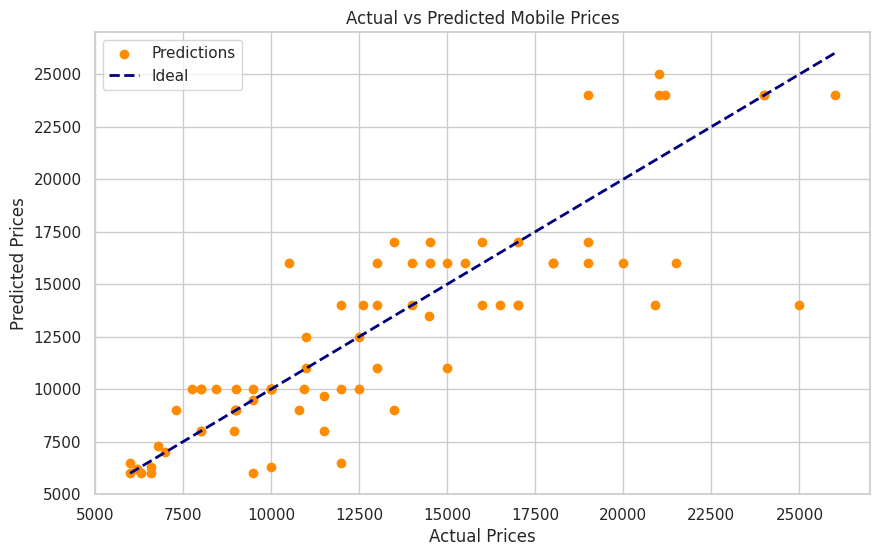

In [303]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_pred, color='darkorange', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='navy', lw=2, linestyle='--', label='Ideal')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Mobile Prices')
plt.legend()
plt.show()


In [269]:
from sklearn.svm import SVC

# Support Vector Regressor

In [282]:
# Training
model = SVC()
model.fit(X_train, y_train)
svm_pred  = model.predict(X_test)

## Support Vector Regressor Accuracy rate is 26.92% which is very bad score

In [283]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(f"Model Accuracy : {accuracy_score(svm_pred, y_test)}")
print(f"classification_report : \n {classification_report(svm_pred, y_test)}")

Model Accuracy : 0.2692307692307692
classification_report : 
               precision    recall  f1-score   support

        5999       0.50      0.25      0.33         4
        6199       1.00      1.00      1.00         2
        6299       0.00      0.00      0.00         2
        6499       0.00      0.00      0.00         2
        6599       0.00      0.00      0.00         0
        6799       0.00      0.00      0.00         0
        6999       1.00      1.00      1.00         1
        7299       0.00      0.00      0.00         1
        7749       0.00      0.00      0.00         0
        7999       0.50      0.50      0.50         4
        8449       0.00      0.00      0.00         0
        8940       0.00      0.00      0.00         0
        8990       0.00      0.00      0.00         0
        8999       0.67      0.33      0.44         6
        9499       0.33      1.00      0.50         1
        9699       0.00      0.00      0.00         1
        9999       

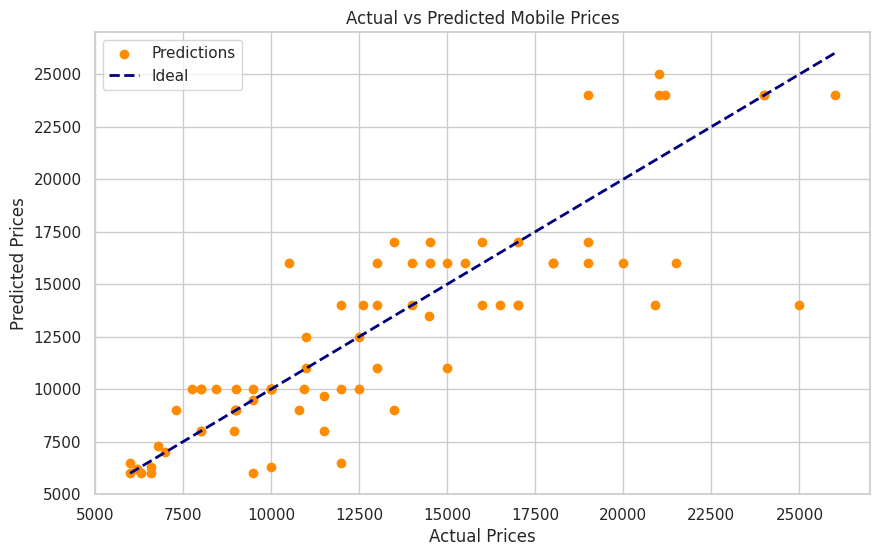

In [296]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_pred, color='darkorange', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='navy', lw=2, linestyle='--', label='Ideal')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Mobile Prices')
plt.legend()
plt.show()





###Model appears to have a good fit with an R² score of 0.71. However, the MSE and MAE values suggest there are some noticeable errors.

In [285]:
print(f" R2 Score {r2_score(svm_pred, y_test)}")
print(f" mean_squared_error {mean_squared_error(svm_pred, y_test)}")
print(f" mean_absolute_error {mean_absolute_error(svm_pred, y_test)}")

 R2 Score 0.7158084753297547
 mean_squared_error 7052213.91025641
 mean_absolute_error 1807.448717948718


# importing random forest classifier from assemble module

In [275]:

from sklearn.ensemble import RandomForestClassifier

## RandomForest Accuracy rate is  73.07% which is satisfactory score

In [288]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
rfc_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, rfc_pred))


ACCURACY OF THE MODEL: 0.7307692307692307


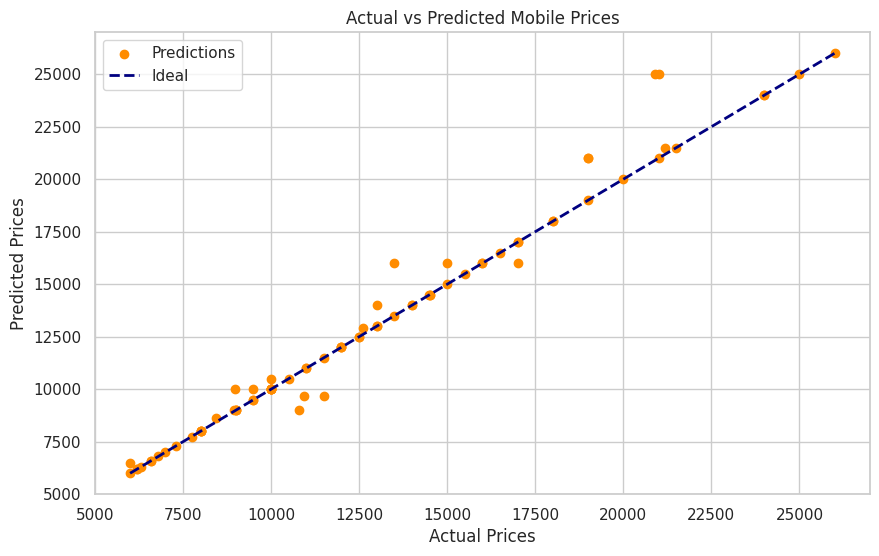

In [295]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rfc_pred, color='darkorange', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='navy', lw=2, linestyle='--', label='Ideal')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Mobile Prices')
plt.legend()
plt.show()

In [290]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(f"Model Accuracy : {accuracy_score(rfc_pred, y_test)}")
print(f"classification_report : \n {classification_report(rfc_pred, y_test)}")

Model Accuracy : 0.7307692307692307
classification_report : 
               precision    recall  f1-score   support

        5999       0.50      1.00      0.67         1
        6199       1.00      1.00      1.00         2
        6299       1.00      1.00      1.00         1
        6499       0.00      0.00      0.00         1
        6599       1.00      1.00      1.00         2
        6799       1.00      1.00      1.00         1
        6999       1.00      1.00      1.00         1
        7299       1.00      1.00      1.00         1
        7749       1.00      1.00      1.00         1
        7999       1.00      1.00      1.00         4
        8449       0.00      0.00      0.00         0
        8649       0.00      0.00      0.00         1
        8940       0.00      0.00      0.00         0
        8990       0.00      0.00      0.00         0
        8999       1.00      0.60      0.75         5
        9499       0.67      1.00      0.80         2
        9699       

### Random Forest Regressor provided 0.97% a good fit for predicting mobile prices, as indicated by the high R² score and relatively low MSE and MAE.

In [292]:
print(f" R2 Score {r2_score(rfc_pred, y_test)}")
print(f" mean_squared_error {mean_squared_error(rfc_pred, y_test)}")
print(f" mean_absolute_error {mean_absolute_error(rfc_pred, y_test)}")

 R2 Score 0.9728038015337467
 mean_squared_error 771174.4230769231
 mean_absolute_error 331.62820512820514


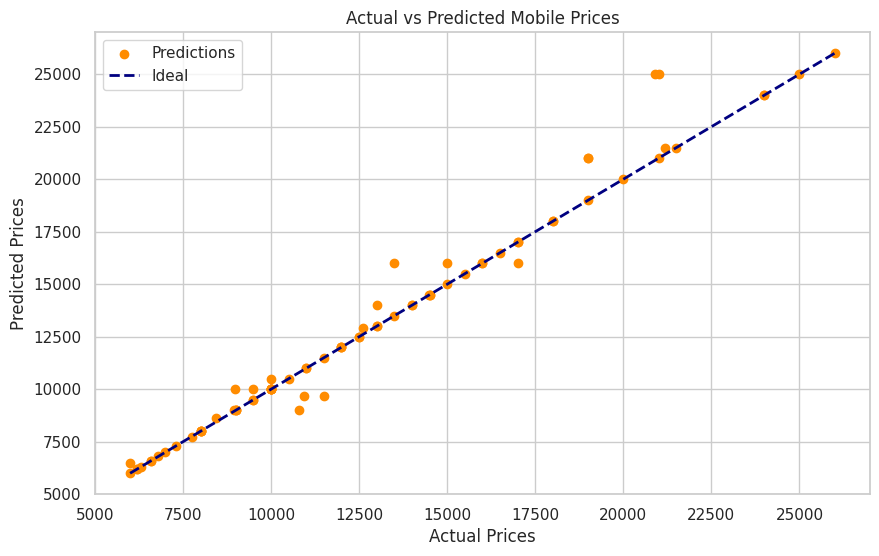

In [294]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rfc_pred, color='darkorange', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='navy', lw=2, linestyle='--', label='Ideal')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Mobile Prices')
plt.legend()
plt.show()

# Gradient Boosting Regressor

In [316]:
from sklearn.ensemble import GradientBoostingClassifier


In [318]:

# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# Fit to training set
gbc.fit(X_train, y_train)

# Predict on test set
gbcpred_y = gbc.predict(X_test)

# accuracy
acc = accuracy_score(y_test, gbcpred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.76


In [319]:
pd.DataFrame({"gbcpred_y": gbcpred_y,"y_test":y_test})

,gbcpred_y,y_test
414,11209,8990
470,12900,12599
471,16499,16499
46,7999,7999
55,18999,18999
...,...,...
144,11499,11499
290,8999,8999
253,25999,25999
378,15999,13499


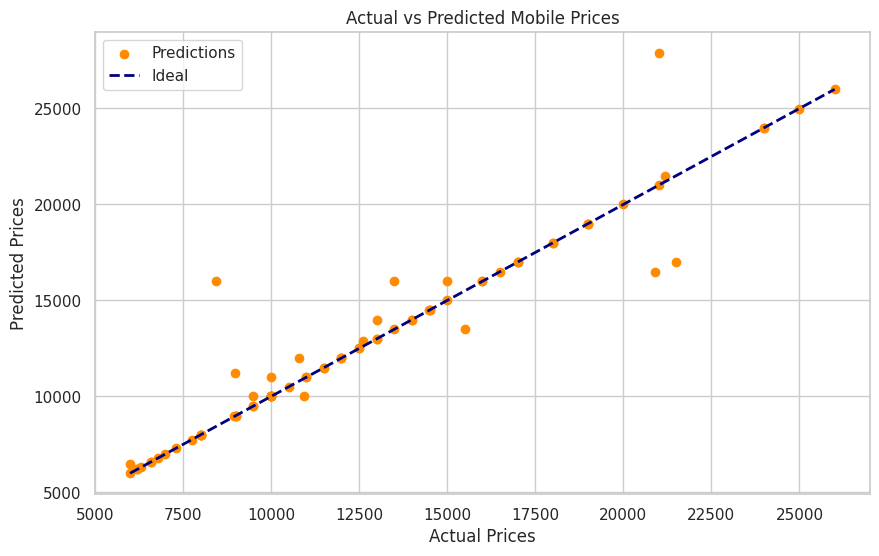

In [320]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gbcpred_y, color='darkorange', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='navy', lw=2, linestyle='--', label='Ideal')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Mobile Prices')
plt.legend()
plt.show()

In [321]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(f"classification_report : \n {classification_report(gbcpred_y, y_test)}")

classification_report : 
               precision    recall  f1-score   support

        5999       0.50      1.00      0.67         1
        6199       1.00      1.00      1.00         2
        6299       1.00      1.00      1.00         1
        6499       0.00      0.00      0.00         1
        6599       1.00      1.00      1.00         2
        6799       1.00      1.00      1.00         1
        6999       1.00      1.00      1.00         1
        7299       1.00      1.00      1.00         1
        7749       1.00      1.00      1.00         1
        7999       1.00      1.00      1.00         4
        8449       0.00      0.00      0.00         0
        8940       0.00      0.00      0.00         0
        8990       0.00      0.00      0.00         0
        8999       1.00      0.75      0.86         4
        9499       0.67      1.00      0.80         2
        9999       0.86      0.75      0.80         8
       10499       1.00      1.00      1.00         1
 

In [322]:
print(f" R2 Score {r2_score(rfc_pred, y_test)}")
print(f" mean_squared_error {mean_squared_error(rfc_pred, y_test)}")
print(f" mean_absolute_error {mean_absolute_error(rfc_pred, y_test)}")

 R2 Score 0.9728038015337467
 mean_squared_error 771174.4230769231
 mean_absolute_error 331.62820512820514


Gradient Boosting Regressor  provided r2 score  0.97% a good fit for predicting mobile prices, as indicated by the high R² score and relatively low MSE and MAE.